# Implementazione in python di un algoritmo di apprendimento perceptron
La cella successiva mostra com'è possibile **implementare** un semplice algoritmo **percetron** in python,lo implmenteremo come oggetto in modo che possa essere poi istanziato in qualsiasi momento.<br>(*pag. 22,23*)


In [3]:
import numpy as np

class Perceptron(object):
    """Classe per implementare il perceptron in python

    Parametri:
        -eta: float
            tasso di apprendimento (compreso tra 0.0 e 1.0)
        -n_iter: int
            i passi di aggiustamento dei pesi che vengono compiuti sul dataset

    Attributi:
        -w_: array monodimensionale
            i pesi dopo essere stati aggiustati 
        -errors: list
            numero di errori in quel passo
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Inserimento dei dati di addestramento
        Parametri:
            -X: {simile a un array(ad esempio un dataset .csv)}, forma = [nCampioni, nCaratteristiche]
                vettore dei dati di addestramento, per caratteristiche si intende i campi che vengono valutati
                per ogni campione
            -y: {simile a un array(ad esempio un dataset .csv)}, forma = [nCampioni]
                array monodimensionale dove mettiamo i risultati
        Return:
            self: object
                ritorna sè stesso ma addestrato    
        """
        #N.B: GLI ELEMENTI CON '_' SONO PER CONVENZIONE QUELLI NON INIZIALIZZATI DAL COSTRUTTORE

        self.w_ = np.zeros(1 + X.shape[1]) # costruiamo un array di dimensione [nCampioni + 1] pieno di zero per i pesi
        self.errors_ = []                  # costruiamo la lista degli errori 

        for i in range(self.n_iter):       # ciclo per il numero di passi scelto nella creazione dell'oggetto
            errors = 0
            for xi, target in zip(X, y):         # ciclo a due var, si incrementano insieme, posso farlo perchè len(X)==len(y)     
                update = self.eta * (target - self.predict(xi))  #implementazione della prima parte della formula del perceptron
                self.w_[1:] += update * xi   # aggiornamento dei pesi contenuti nel vettore w_ dall'indice 1 in poi
                self.w_[0] += update         # aggiornamento della soglia secondo la formula del perceptron (pag. 19)
                errors += int(update != 0.0) # conta degli errori 
            self.errors_.append(errors)      # aggiungo all'indice i-esimo il numero di errori del passo i-esimo
        return self
    def net_input(self, X):
        "Calcolo dell'input, esegue in sostanza il prodotto vettoriale tra pesi e dati"
        return np.dot(X, self.w_[1:]) + self.w_[0] 
                    
    def predict(self, X):
        "Ritorna il vettore delle etichette di classe predette"
        return np.where(self.net_input(X) >= 0.0, 1, -1)    # restituisce un vettore dove il valore della cella i-esima è 1
                                                            # se la cella del vettore X è >= 0 altrimenti è 0
    

# Addestrare un modello del perceptron sul dataset Iris
Utilizzeremo un dataset molto usato per gli esempi che viene usato per la classificazione delle speci di iris da vari dati, per motivi di semplicità noi caricheremo solo due classi: *Iris versicolor* e *Iris setosa* e prenderemo in considerazione solo due dati: *lunghezza sepalo* e *lunghezza petalo*.
Non solo **classificheremo i diversi elementi** ma **mostreremo**, con l'aiuto di grafici **l'andamento degli errori** rispetto alle epoch e creeremo una **grafico** delle **regioni decisionali**(un grafico dove vedremo la separazione tra le due classi) <br>*(pag 24:27)*


In [4]:
import pandas as pd
# assegno a df il dataset scaricato all'indirizzo
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail() # ritorna le ultime 5 righe, quando viene invocato in jupyter le visualizza anche                                                  

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


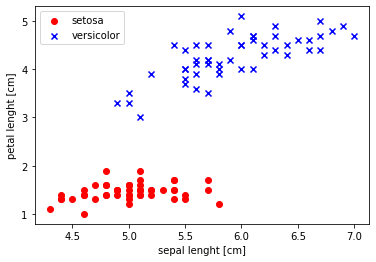

In [5]:
import matplotlib.pyplot as plt
y = df.iloc[0:100, 4].values # prendiamo i valori da 0 a 100 della colonna di indice 4 e li mettiamo in y
y = np.where(y == 'Iris-setosa', -1, 1) # assegniamo all'iris setosa il valore -1 e alla versicolor il valore 1
X = df.iloc[0:100, [0, 2]].values # prendiamo i primi 100 valori delle colonne 2 e 4 dove ci sono il sepal e il petal lenght 

# usiamo la libreria plt per tracciare un grafico per visualizzare le due classi la prima quadra è l'array che viene
# messo sull'asse x, la seconda viene messo sull'asse y
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') 
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal lenght [cm]') # comando per scrivere sotto l'asse x di che dato stiamo parlando 
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left') # per mostrare la legenda
plt.show()

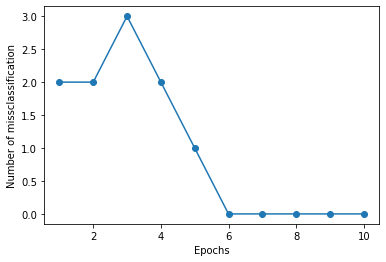

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o') # plotting degli errori contenuti nell'array ppn.errors_ sempre di lunghezza = n_epoch
plt.xlabel('Epochs')
plt.ylabel('Number of missclassification')
plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): # funzione per il grafico decisionale
    markers = ('s', 'x', 'o', '^', 'v') # i vari caratteri dientificatori della libreria
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # e i vari colori
    cmap = ListedColormap(colors[:len(np.unique(y))]) # creiamo una mappa dei colori dalla lista dei colori
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # estrae il minimo e il max del sepal lenght 
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # e petal lenght
    
    # crea il grafico bianco su cui disegneremo il grafico decisionale, dicendogli che i due assi sono due intervalli
    # da x1_min a x1_max andando di resolution in resolution (di 0.02 in 0.02) e x2_min ecc per il secondo
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution)) 
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # predizione dei dati e riemimento di z
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap) # la magia che colora la mappa
    
    plt.xlim(xx1.min(), xx1.max()) #
    plt.ylim(xx2.min(), xx2.max()) 
    
    for idx, cl in enumerate(np.unique(y)): # ciclo che mette un 'segnalino' per ogni elemento
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(idx), marker =markers[idx], label=cl)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


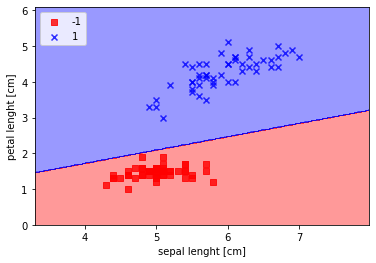

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]') 
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()